<a href="https://colab.research.google.com/github/mohanrajmit/glaucoma-classification/blob/main/CNN_glaucoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization


In [2]:
!git clone https://github.com/mohanrajmit/glaucoma-classification.git

Cloning into 'glaucoma-classification'...
remote: Enumerating objects: 4870, done.
remote: Counting objects: 100% (4870/4870), done.
remote: Compressing objects: 100% (4868/4868), done.
remote: Total 4870 (delta 2), reused 4862 (delta 0), pack-reused 0
Receiving objects: 100% (4870/4870), 294.67 MiB | 33.67 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (4869/4869), done.


In [21]:
x_train=[]
y_train=[]

from imutils import paths
import numpy as np
import joblib
from keras.preprocessing import image
for image_file in paths.list_images("/content/glaucoma-classification/dataset"):

  # Load the current image file
  image_data = image.load_img(image_file, target_size=(73, 73))

  # Convert the loaded image file to a numpy array
  image_array = image.img_to_array(image_data)

  # Add the current image to our list of training images
  x_train.append(image_array)

  # Add a label for this image. If it was a not_bird image, label it 0. If it was a bird, label it 1.
  path = image_file.split("/")[-2]
  y_train.append(path)

In [22]:
# Empty lists to hold the images and labels for each each image
x_test = []
y_test = []

# Load the test data set by looping over every image file
for image_file in paths.list_images("/content/glaucoma-classification/test_dataset"):

    # Load the current image file
    image_data = image.load_img(image_file, target_size=(73, 73))

    # Convert the loaded image file to a numpy array
    image_array = image.img_to_array(image_data)

    # Add the current image to our list of test images
    x_test.append(image_array)
    image_path = image_file.split("/")[-2]
    y_test.append(image_path)

In [23]:

# Convert the lis_t of test images to a numpy array

x_test = np.array(x_test)
x_train = np.array(x_train)

In [24]:
# Normalize image data (pixel values from 0 to 255) to the 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [25]:
print(x_test.shape)
print(x_train.shape)

(13, 73, 73, 3)
(4854, 73, 73, 3)


In [26]:
from keras.layers import Input
from keras.models import Model
from keras.models import Sequential

model = Sequential()
#model.add()
#ip = Input(shape=(32, 32, 3))
model.add(Conv2D(32, (3, 3), input_shape=(73,73,3),padding='same', activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [29]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [31]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [32]:
model.fit(x_train,y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
152/152 [==============================] - 6s 33ms/step - loss: 0.5022 - accuracy: 0.7505 - val_loss: 0.5008 - val_accuracy: 0.7692
Epoch 2/10
152/152 [==============================] - 5s 31ms/step - loss: 0.3326 - accuracy: 0.8513 - val_loss: 0.6996 - val_accuracy: 0.4615
Epoch 3/10
152/152 [==============================] - 5s 31ms/step - loss: 0.2593 - accuracy: 0.8929 - val_loss: 0.3507 - val_accuracy: 0.8462
Epoch 4/10
152/152 [==============================] - 5s 31ms/step - loss: 0.2227 - accuracy: 0.9096 - val_loss: 0.2921 - val_accuracy: 0.8462
Epoch 5/10
152/152 [==============================] - 5s 31ms/step - loss: 0.1845 - accuracy: 0.9289 - val_loss: 0.4134 - val_accuracy: 0.7692
Epoch 6/10
152/152 [==============================] - 5s 31ms/step - loss: 0.1362 - accuracy: 0.9495 - val_loss: 0.3187 - val_accuracy: 0.7692
Epoch 7/10
152/152 [==============================] - 5s 31ms/step - loss: 0.1233 - accuracy: 0.9493 - val_loss: 0.1308 - val_accuracy: 1.0000

In [34]:

# Save the trained model to a file so we can use it to make predictions later
model.save("glaucoma_model.h5")

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model

In [36]:
# Load the model we trained
model = load_model('glaucoma_model.h5')
predictions = model.predict(x_test, batch_size=32, verbose=1)

# If the model is more than 50% sure the object is a bird, call it a bird.
# Otherwise, call it "not a bird".
predictions = predictions > 0.5

# Calculate how many mis-classifications the model makes
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Calculate Precision and Recall for each class
report = classification_report(y_test, predictions)
print(report)

1/1 [==============================] - 0s 126ms/step
True Positives: 6
True Negatives: 6
False Positives: 0
False Negatives: 1
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.86      0.92         7

    accuracy                           0.92        13
   macro avg       0.93      0.93      0.92        13
weighted avg       0.93      0.92      0.92        13



[[0.]]
not glaucoma


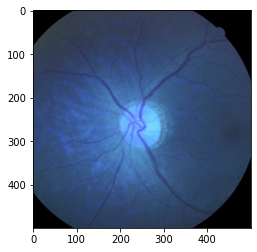

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img=cv2.imread("/content/glaucoma-classification/test_dataset/non_glaucoma/0124.jpg")
img2=cv2.resize(img, (73, 73),interpolation=cv2.INTER_AREA)
#img1=img2.flatten()
#img1=img1.reshape(-1,1)
# insert a new axis along the row
#sample_test_image = x_test[100]
b = np.expand_dims(img2, axis=0)
res=model.predict(b)
#print(label_name[int(res)])

plt.imshow(img)
print(res)
if res > 0.5:
  print("glaucoma")
else:
  print("not glaucoma")

[[1.]]
glaucoma


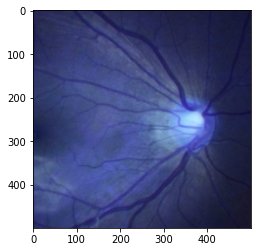

In [39]:
img=cv2.imread("/content/glaucoma-classification/test_dataset/suspicious_glaucoma/2015.jpg")
img2=cv2.resize(img, (73, 73),interpolation=cv2.INTER_AREA)
#img1=img2.flatten()
#img1=img1.reshape(-1,1)
# insert a new axis along the row
#sample_test_image = x_test[100]
b = np.expand_dims(img2, axis=0)
res=model.predict(b)
#print(label_name[int(res)])

plt.imshow(img)
print(res)
if res > 0.5:
  print("glaucoma")
else:
  print("not glaucoma")